#### Homework 1 - Movie Lens Data Analysis

##### Done by Mohanapriya Subramanian

In [7]:
import pandas as pd
mlmdata = pd.read_csv('ml1mdata2000.csv')
# get the date from timestamp:
mlmdata['date']=pd.to_datetime(mlmdata['timestamp'], unit='s', errors='coerce')
#using the DatetimeIndex() function to extract year and month:
mlmdata['year'] = pd.DatetimeIndex(mlmdata['date']).year
mlmdata['month'] = pd.DatetimeIndex(mlmdata['date']).month

Import Movie lens dataset to jupyter Environment
Then convert timestamp column to year and month

In [8]:
print(mlmdata.year.unique())

[2000 2001 2002 2003]


unique() returns the unique elements from the year attribute in an array -> 2000, 2001, 2002, 2003 are the unique years featured in this dataset

In [57]:
#Count using size()
print(mlmdata.groupby('year').size().reset_index(name='No of Records'))
#Count using count()
print(mlmdata.groupby('year').count())
#Using count() user_id
print(mlmdata.groupby('year').count()['user_id'])

   year  No of Records
0  2000         904757
1  2001          68058
2  2002          24046
3  2003           3348
      user_id  movie_id  rating  timestamp  gender     age  occupation  \
year                                                                     
2000   904744    904685  904757     904757  904757  904698      904708   
2001    68058     68052   68058      68058   68058   68053       68054   
2002    24046     24045   24046      24046   24046   24044       24044   
2003     3348      3347    3348       3348    3348    3348        3348   

         zip   title  genres    date   month  rating_category  
year                                                           
2000  904694  904608  904678  904757  904757           904757  
2001   68052   68043   68047   68058   68058            68058  
2002   24044   24038   24043   24046   24046            24046  
2003    3346    3347    3348    3348    3348             3348  
year
2000    904744
2001     68058
2002     24046
2003  

 To Find number of records for each year, we can use size() or count(). These are the different ways to use these

In [34]:
mlmdata['rating_category'] = 'unknown'

Added a column rating_category and assigned a value "unknown" to that

In [6]:
print(mlmdata.head(5))

   user_id  movie_id  rating  timestamp gender   age  occupation    zip  \
0      1.0    1193.0       5  978300760      F   1.0        10.0  48067   
1      2.0    1193.0       5  978298413      M  56.0        16.0  70072   
2     12.0    1193.0       4  978220179      M  25.0        12.0  32793   
3     15.0    1193.0       4  978199279      M  25.0         7.0  22903   
4     17.0    1193.0       5  978158471      M  50.0         1.0  95350   

                                    title genres                date  year  \
0  One Flew Over the Cuckoo's Nest (1975)  Drama 2000-12-31 22:12:40  2000   
1  One Flew Over the Cuckoo's Nest (1975)  Drama 2000-12-31 21:33:33  2000   
2  One Flew Over the Cuckoo's Nest (1975)  Drama 2000-12-30 23:49:39  2000   
3  One Flew Over the Cuckoo's Nest (1975)  Drama 2000-12-30 18:01:19  2000   
4  One Flew Over the Cuckoo's Nest (1975)  Drama 2000-12-30 06:41:11  2000   

   month rating_category  
0     12         unknown  
1     12         unknown  

  The first five rows of the dataframe are displayed using head(5) function

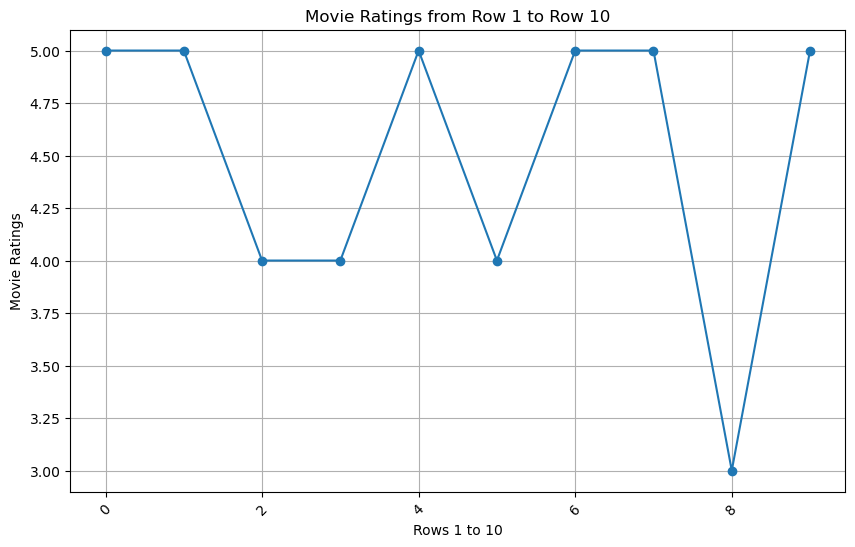

In [11]:
import matplotlib.pyplot as pl
mlmdata1 = (mlmdata.head(10))
pl.figure(figsize=(10, 6))
pl.plot(mlmdata1.rating, marker='o', linestyle='-')
pl.xlabel('Rows 1 to 10')
pl.ylabel('Movie Ratings')
pl.title('Movie Ratings from Row 1 to Row 10')
pl.xticks(rotation=45)
pl.grid(True)

# Display the line plot
pl.show()

A line plot for the movie ratings is plotted with the first ten rows and the following obervation are made
There is no significant pattern in the ratings. The pattern is sparse with inconsistent trend.
The reasons being,
1. We have not introduced necessary dimensions to analyse the data, we can add age or movie name, year to get a considerable pattern
2. Also we have taken a very small dataset for this obervation,Patterns may become more apparent with a larger sample size.

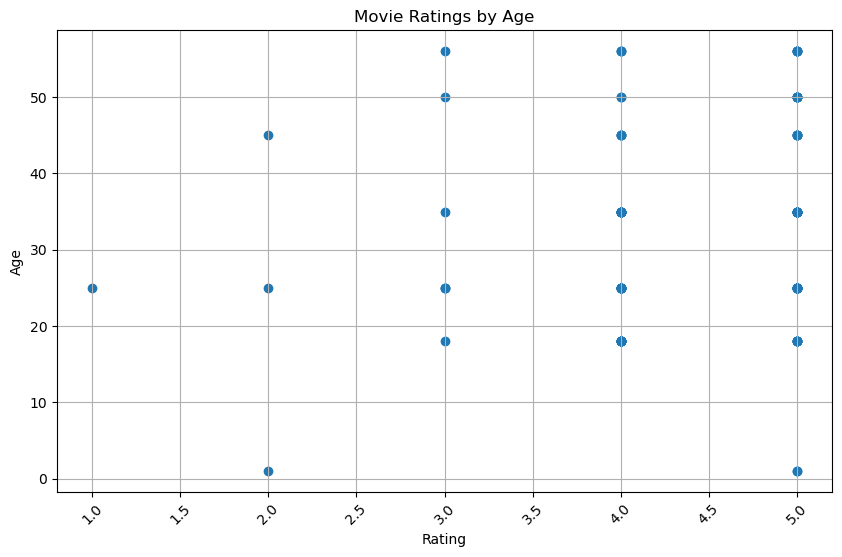

In [20]:
import matplotlib.pyplot as pl
mlmdata1 = (mlmdata.head(100))
pl.figure(figsize=(10, 6))
pl.scatter(mlmdata1.rating, mlmdata1.age,   marker='o', linestyle='-')
pl.xlabel('Rating')
pl.ylabel('Age')
pl.title('Movie Ratings by Age')
pl.xticks(rotation=45)
pl.grid(True)

# Display the line plot
pl.show()

Scatter plot is drawn with the first one hundred rows, where the x axis is rating, and y axis is age and the following obervations are made in the pattern,

1. Denser Concentration of Ratings Between 3 and 5: There is a denser concentration of ratings between 3 and 5, regardless of age, suggests that most users tend to rate movies positively. This is a common trend in movie rating datasets, where users are more likely to rate movies they enjoyed positively. It's interesting to note that this pattern is consistent across different age groups.

2. Presence of Very Low Ratings: The presence of very low ratings (likely close to 1) indicates that some movies received poor ratings from users of various age groups. This suggests that there are movies in the dataset that did not perform well and were disliked by a broad range of users, irrespective of age.

3. Weak Correlation Between Age and Ratings: The observation that there is a weak correlation between age and ratings implies that there isn't a strong relationship between a user's age and the ratings they give to movies. In other words, a user's age does not appear to be a significant predictor of how they rate movies in this dataset. This is consistent with the earlier scatter plot of age vs. rating, which also showed no clear linear relationship.

4. Most Ratings from Users Above 18 Years: The observation that most ratings are from users above 18 years of age makes sense, as younger children may have restricted access to certain movies due to age restrictions and parental controls. Therefore, the majority of ratings are likely from adult users or older teenagers.

These observations provide valuable insights into the dataset's characteristics and user behavior when it comes to movie ratings. It's important to note that these patterns and observations are based on the first one hundred rows of data and with limited dimensions, and the dataset may have additional complexities and trends that can be explored in a more comprehensive analysis.